### Arrears 
Arrears is a financial and legal term that refers to the status of payments in relation to their due dates. The word is most commonly used to describe an obligation or liability that has not received payment by its due date. Therefore, the term arrears applies to an overdue payment. If one or more payments have been missed where regular payments are contractually required, such as mortgage or rent payments and utility or telephone bills, the account is in arrears. Payments that are made at the end of a period are also said to be in arrears. In this case, payment is expected to be made after a service is provided or completed—not before.

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns


In [1]:
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder 
from sklearn import metrics  
LE = LabelEncoder()
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score

In [40]:
train_df=pd.read_excel('./data/Train/train_Data.xlsx')
test_df=pd.read_excel('./data/Test_data/test_Data.xlsx')

KeyboardInterrupt: 

In [4]:
train_df.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


In [5]:
print("NAN values count\n",train_df.isnull().sum(),'\n\n')
print("Zero values Count\n",train_df[train_df == 0].count(axis=0))

NAN values count
 ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64 


Zero values Count
 ID                  0
Frequency           0
InstlmentMode       0
LoanStatus          0
PaymentMode         0
BranchID            0
Area                0
Tenure              0
AssetCost           0
AmountFinance       0
DisbursalAmount     0
EMI                 1
DisbursalDate       0
MaturityDAt

In [6]:
train_df.dtypes

ID                          int64
Frequency                  object
InstlmentMode              object
LoanStatus                 object
PaymentMode                object
BranchID                    int64
Area                       object
Tenure                      int64
AssetCost                   int64
AmountFinance             float64
DisbursalAmount           float64
EMI                       float64
DisbursalDate      datetime64[ns]
MaturityDAte       datetime64[ns]
AuthDate           datetime64[ns]
AssetID                     int64
ManufacturerID              int64
SupplierID                  int64
LTV                       float64
SEX                        object
AGE                       float64
MonthlyIncome             float64
City                       object
State                      object
ZiPCODE                   float64
Top-up Month               object
dtype: object

In [7]:
for col in train_df.columns:
    if train_df[col].dtypes=='object':
        print([col])

['Frequency']
['InstlmentMode']
['LoanStatus']
['PaymentMode']
['Area']
['SEX']
['City']
['State']
['Top-up Month']


In [8]:
# def label_encoding(train_df_series,test_df_series):
#     union=np.union1d(np.array(train_df_series.unique()),np.array(test_df_series.unique()))
#     le=LabelEncoder()
#     le.fit(union)
#     traindf=le.transform(train_df_series)
#     testdf=le.transform(test_df_series)
#     return traindf,testdf

# train_df['BranchID'],test_df['BranchID']=label_encoding(train_df['BranchID'],test_df['BranchID'])
train_df['BranchID']=LE.fit_transform(train_df['BranchID'])
# train_df['Frequency'],test_df['Frequency']=label_encoding(train_df['Frequency'],test_df['Frequency']).astype(np.int)
# train_df['PaymentMode'],test_df['PaymentMode']=label_encoding(train_df['PaymentMode'],test_df['PaymentMode']).astype(np.int)

In [9]:
print('SEX:\t',train_df['SEX'].unique())
print('Installment_mode:\t',train_df['InstlmentMode'].unique())
print('Loan Status:\t',train_df['LoanStatus'].unique())
# sex_dict={'M':1,'F':0}

train_df['SEX']=train_df['SEX'].fillna(train_df['SEX'].mode()[0])
train_df['AGE']=train_df['AGE'].fillna(train_df['AGE'].median())
train_df['AGE'] = train_df['AGE'].astype(int)

train_df.SEX=train_df.SEX.map({'M':1,'F':0}).astype(np.int)

train_df['Frequency'] = train_df['Frequency'].map({'Monthly':0, 'Quatrly':1, 'Half Yearly':2, 'BI-Monthly':3})
train_df.InstlmentMode=train_df.InstlmentMode.map({'Advance':1,'Arrear':0}).astype(np.int)
train_df.LoanStatus=train_df.LoanStatus.map({'Closed':1,'Active':0}).astype(np.int)

# test_df['ZiPCODE']=test_df.groupby('BranchID')['ZiPCODE'].transform(lambda x:x.fillna(x.mode()[0]))  


SEX:	 ['M' nan 'F']
Installment_mode:	 ['Arrear' 'Advance']
Loan Status:	 ['Closed' 'Active']


In [10]:
train_df['ZiPCODE']=train_df.groupby('BranchID')['ZiPCODE'].transform(lambda x:x.fillna(x.mode()[0]))
train_df['ZiPCODE'] = train_df['ZiPCODE'].astype(str)
train_df['ZiPCODE'] = LE.fit_transform(train_df['ZiPCODE'])
train_df['State'] = LE.fit_transform(train_df['State'])

train_df['PaymentMode'] = LE.fit_transform(train_df['PaymentMode'])
train_df['MaturityDAte'].fillna(pd.to_datetime('2016-12-15'), inplace=True)


train_df['ManufacturerID'].fillna(0, inplace=True)
train_df['ManufacturerID'] = train_df['ManufacturerID'].astype(str)
train_df['ManufacturerID'] = LE.fit_transform(train_df['ManufacturerID'])
train_df['SupplierID'] = train_df['SupplierID'].astype(str)
train_df['SupplierID'] = LE.fit_transform(train_df['SupplierID'])



In [11]:
train_df.drop(['Area','City','AssetID','ZiPCODE','SEX'],axis=1,inplace=True)
train_df.head()

# train_df['SEX']=train_df['SEX'].fillna(train_df['SEX'].mode()[0])

# train_df.SEX=train_df.SEX.map({'M':1,'F':0}).astype(np.int)

# print(train_df['SEX'].unique())

# print(train_df['SEX'].unique())
# print(train_df['InstlmentMode'].unique())
# print(train_df['LoanStatus'].unique())


,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,...,DisbursalDate,MaturityDAte,AuthDate,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,State,Top-up Month
0,1,0,0,1,9,0,48,450000,275000.0,275000.0,...,2012-02-10,2016-01-15,2012-02-10,6,1820,61.11,49,35833.33,12,> 48 Months
1,2,0,1,1,7,147,47,485000,350000.0,350000.0,...,2012-03-31,2016-02-15,2012-03-31,3,2638,70.00,23,666.67,12,No Top-up Service
2,3,1,0,0,3,0,68,690000,519728.0,519728.0,...,2017-06-17,2023-02-10,2017-06-17,2,732,69.77,39,45257.00,12,12-18 Months
3,7,0,1,1,1,58,48,480000,400000.0,400000.0,...,2013-11-29,2017-11-10,2013-11-29,2,2295,80.92,24,20833.33,12,> 48 Months
4,8,0,0,1,1,74,44,619265,440000.0,440000.0,...,2011-12-08,2015-07-05,2011-12-08,1,1814,71.05,56,27313.67,4,36-48 Months


In [12]:
train_df.dtypes
train_df['MonthlyIncome']=train_df['MonthlyIncome'].fillna(0)

In [13]:
train_df['MaturityDAte_day'] = train_df['MaturityDAte'].dt.day
train_df['MaturityDAte_month'] = train_df['MaturityDAte'].dt.month
train_df['MaturityDAte_year'] = train_df['MaturityDAte'].dt.year
train_df['AuthDate_day'] = train_df['AuthDate'].dt.day
train_df['AuthDate_month'] = train_df['AuthDate'].dt.month
train_df['AuthDate_year'] = train_df['AuthDate'].dt.year
train_df['DisbursalDate_day'] = train_df['DisbursalDate'].dt.day
train_df['DisbursalDate_month'] = train_df['DisbursalDate'].dt.month
train_df['DisbursalDate_year'] = train_df['DisbursalDate'].dt.year
train_df.drop(['MaturityDAte','AuthDate','DisbursalDate'], axis=1, inplace=True)


In [14]:
train_df.isnull().sum()


ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
ManufacturerID         0
SupplierID             0
LTV                    0
AGE                    0
MonthlyIncome          0
State                  0
Top-up Month           0
MaturityDAte_day       0
MaturityDAte_month     0
MaturityDAte_year      0
AuthDate_day           0
AuthDate_month         0
AuthDate_year          0
DisbursalDate_day      0
DisbursalDate_month    0
DisbursalDate_year     0
dtype: int64

In [16]:
train_df.shape
# classify_train=train_df.copy()

(128655, 27)

In [15]:
LE=LabelEncoder()

y=train_df['Top-up Month']
LE.fit(np.unique(y.values))
# print(list(LE.classes_))
le_name_mapping = dict(zip(LE.classes_, LE.transform(LE.classes_)))
print(le_name_mapping)
y=LE.fit_transform(y)
X=train_df.drop(columns=['Top-up Month'])

{' > 48 Months': 0, '12-18 Months': 1, '18-24 Months': 2, '24-30 Months': 3, '30-36 Months': 4, '36-48 Months': 5, 'No Top-up Service': 6}


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

In [19]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train_scaled= sc.fit_transform(X_train)
# X_test_scaled= sc.transform(X_test)

In [18]:
# train_df.isnull().sum()

In [21]:
# random_forest_model = RandomForestClassifier(n_estimators = 50)
# random_forest_model.fit(X_train_scaled,y_train)
# y_pred = random_forest_model.predict(X_test_scaled)
# random_forest_model.score(X_train_scaled,y_train)

0.9995854535656176

In [19]:
# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,y_pred)
# sns.heatmap(cm)

In [20]:
# plot_cm=pd.crosstab(y_test,y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)
# plot_cm

In [21]:
# metrics.f1_score(y_test,y_pred,average=None)

#### On Training data SMOTE and LightGBM

In [23]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [24]:
smote=SMOTE()
X_smote1,y_smote1=smote.fit_resample(X,y)
X_train, X_test, y_train, y_test=train_test_split(X_smote1,y_smote1,test_size=0.25)


In [25]:
# !pip install lightgbm
# !pip install shap

import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap


In [24]:
# clf=lgb.LGBMClassifier(
#     n_estimators=400,
#     learning_rate=0.03,
#     num_leaves=30,
#     colsample_bytree=.8,
#     subsample=.9,
#     max_depth=7,
#     reg_alpha=.1,
#     reg_lambda=.1,
#     min_split_gain=.01,
#     min_child_weight=2,
#     silent=-1,
#     verbose=-1,
# )

In [28]:
# clf.fit(X_smote1, y_smote1, 
#     eval_set= [(X_smote1, y_smote1),(X_test, y_test)], 
#     verbose=100, early_stopping_rounds=40  #30
# )
# explainer = shap.TreeExplainer(clf)
# shap_values=explainer.shap_values(X_test.iloc[:10000,:])
# shap.summary_plot(shap_values, X_test.iloc[:20000,:])
# shap.dependence_plot("AuthDate_year", shap_values[0], X_test.iloc[:10000,:])

###### With out Early stopping

In [29]:
# lgboost=LGBMClassifier(colsample_bytree=0.8, learning_rate=0.03, max_depth=7,
#                min_child_weight=2, min_split_gain=0.01, n_estimators=400,
#                num_leaves=30, reg_alpha=0.1, reg_lambda=0.1, silent=-1,
#                subsample=0.9, verbose=-1)

# lgboost.fit(X_smote1,y_smote1)
# explainer = shap.TreeExplainer(lgboost)
# shap_values=explainer.shap_values(X_test.iloc[:10000,:])
# shap.summary_plot(shap_values,X_test.iloc[:10000,:])

In [31]:
# !pip install catboost
import catboost

In [32]:
from catboost import CatBoostClassifier,Pool
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt  

In [33]:
train_pool=Pool(X_train,y_train)
test_pool=Pool(X_test,y_test)

In [34]:
cboost=CatBoostClassifier(learning_rate=0.1,depth=10,loss_function='MultiClass',eval_metric='Accuracy',task_type="GPU",devices='0:1')
cboost.fit(train_pool,plot=True,eval_set=test_pool)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4930239	test: 0.4913410	best: 0.4913410 (0)	total: 82.1ms	remaining: 1m 22s
1:	learn: 0.5048549	test: 0.5025524	best: 0.5025524 (1)	total: 164ms	remaining: 1m 21s
2:	learn: 0.5158806	test: 0.5140799	best: 0.5140799 (2)	total: 247ms	remaining: 1m 22s
3:	learn: 0.5183911	test: 0.5168814	best: 0.5168814 (3)	total: 319ms	remaining: 1m 19s
4:	learn: 0.5235049	test: 0.5222808	best: 0.5222808 (4)	total: 385ms	remaining: 1m 16s
5:	learn: 0.5241905	test: 0.5225487	best: 0.5225487 (5)	total: 450ms	remaining: 1m 14s
6:	learn: 0.5278045	test: 0.5264697	best: 0.5264697 (6)	total: 515ms	remaining: 1m 13s
7:	learn: 0.5306328	test: 0.5292391	best: 0.5292391 (7)	total: 581ms	remaining: 1m 12s
8:	learn: 0.5339467	test: 0.5328602	best: 0.5328602 (8)	total: 649ms	remaining: 1m 11s
9:	learn: 0.5370089	test: 0.5361545	best: 0.5361545 (9)	total: 710ms	remaining: 1m 10s
10:	learn: 0.5417478	test: 0.5403326	best: 0.5403326 (10)	total: 778ms	remaining: 1m 9s
11:	learn: 0.5437422	test: 0.5422289	best

94:	learn: 0.6638092	test: 0.6541233	best: 0.6541233 (94)	total: 6.57s	remaining: 1m 2s
95:	learn: 0.6645323	test: 0.6550232	best: 0.6550232 (95)	total: 6.63s	remaining: 1m 2s
96:	learn: 0.6658304	test: 0.6562123	best: 0.6562123 (96)	total: 6.71s	remaining: 1m 2s
97:	learn: 0.6666393	test: 0.6572837	best: 0.6572837 (97)	total: 6.77s	remaining: 1m 2s
98:	learn: 0.6676624	test: 0.6580925	best: 0.6580925 (98)	total: 6.84s	remaining: 1m 2s
99:	learn: 0.6686605	test: 0.6588317	best: 0.6588317 (99)	total: 6.91s	remaining: 1m 2s
100:	learn: 0.6698104	test: 0.6599030	best: 0.6599030 (100)	total: 6.99s	remaining: 1m 2s
101:	learn: 0.6710014	test: 0.6612101	best: 0.6612101 (101)	total: 7.06s	remaining: 1m 2s
102:	learn: 0.6725655	test: 0.6624153	best: 0.6624153 (102)	total: 7.13s	remaining: 1m 2s
103:	learn: 0.6735940	test: 0.6628170	best: 0.6628170 (103)	total: 7.2s	remaining: 1m 2s
104:	learn: 0.6754688	test: 0.6647133	best: 0.6647133 (104)	total: 7.27s	remaining: 1m 2s
105:	learn: 0.6766473	t

187:	learn: 0.7550647	test: 0.7392667	best: 0.7392667 (187)	total: 13.2s	remaining: 57.1s
188:	learn: 0.7558057	test: 0.7399523	best: 0.7399523 (188)	total: 13.3s	remaining: 57s
189:	learn: 0.7565288	test: 0.7406540	best: 0.7406540 (189)	total: 13.3s	remaining: 56.9s
190:	learn: 0.7572466	test: 0.7413879	best: 0.7413879 (190)	total: 13.4s	remaining: 56.8s
191:	learn: 0.7580769	test: 0.7421003	best: 0.7421003 (191)	total: 13.5s	remaining: 56.7s
192:	learn: 0.7584911	test: 0.7425664	best: 0.7425664 (192)	total: 13.5s	remaining: 56.6s
193:	learn: 0.7596339	test: 0.7434984	best: 0.7434984 (193)	total: 13.6s	remaining: 56.6s
194:	learn: 0.7603695	test: 0.7444090	best: 0.7444090 (194)	total: 13.7s	remaining: 56.5s
195:	learn: 0.7612373	test: 0.7452179	best: 0.7452179 (195)	total: 13.8s	remaining: 56.5s
196:	learn: 0.7620158	test: 0.7459142	best: 0.7459142 (196)	total: 13.8s	remaining: 56.4s
197:	learn: 0.7629211	test: 0.7466160	best: 0.7466160 (197)	total: 13.9s	remaining: 56.4s
198:	learn: 

281:	learn: 0.8181997	test: 0.7986716	best: 0.7986716 (281)	total: 20s	remaining: 50.9s
282:	learn: 0.8186139	test: 0.7991590	best: 0.7991590 (282)	total: 20s	remaining: 50.8s
283:	learn: 0.8192656	test: 0.7997482	best: 0.7997482 (283)	total: 20.1s	remaining: 50.7s
284:	learn: 0.8198549	test: 0.8003696	best: 0.8003696 (284)	total: 20.2s	remaining: 50.7s
285:	learn: 0.8208333	test: 0.8012320	best: 0.8012320 (285)	total: 20.3s	remaining: 50.6s
286:	learn: 0.8211672	test: 0.8016713	best: 0.8016713 (286)	total: 20.3s	remaining: 50.5s
287:	learn: 0.8217850	test: 0.8022444	best: 0.8022444 (287)	total: 20.4s	remaining: 50.4s
288:	learn: 0.8220939	test: 0.8023837	best: 0.8023837 (288)	total: 20.5s	remaining: 50.4s
289:	learn: 0.8228403	test: 0.8029676	best: 0.8029676 (289)	total: 20.5s	remaining: 50.3s
290:	learn: 0.8230921	test: 0.8034389	best: 0.8034389 (290)	total: 20.6s	remaining: 50.2s
291:	learn: 0.8233295	test: 0.8035996	best: 0.8035996 (291)	total: 20.7s	remaining: 50.1s
292:	learn: 0.

374:	learn: 0.8612366	test: 0.8391997	best: 0.8391997 (374)	total: 26.6s	remaining: 44.3s
375:	learn: 0.8612919	test: 0.8392801	best: 0.8392801 (375)	total: 26.6s	remaining: 44.2s
376:	learn: 0.8615973	test: 0.8396283	best: 0.8396283 (376)	total: 26.7s	remaining: 44.1s
377:	learn: 0.8620758	test: 0.8399711	best: 0.8399711 (377)	total: 26.8s	remaining: 44.1s
378:	learn: 0.8622722	test: 0.8402657	best: 0.8402657 (378)	total: 26.9s	remaining: 44s
379:	learn: 0.8624704	test: 0.8402978	best: 0.8402978 (379)	total: 26.9s	remaining: 43.9s
380:	learn: 0.8627061	test: 0.8405924	best: 0.8405924 (380)	total: 27s	remaining: 43.8s
381:	learn: 0.8629471	test: 0.8407639	best: 0.8407639 (381)	total: 27.1s	remaining: 43.8s
382:	learn: 0.8634382	test: 0.8411817	best: 0.8411817 (382)	total: 27.1s	remaining: 43.7s
383:	learn: 0.8640667	test: 0.8418727	best: 0.8418727 (383)	total: 27.2s	remaining: 43.6s
384:	learn: 0.8643577	test: 0.8420334	best: 0.8420334 (384)	total: 27.3s	remaining: 43.6s
385:	learn: 0.

468:	learn: 0.8925461	test: 0.8690039	best: 0.8690039 (468)	total: 33.3s	remaining: 37.7s
469:	learn: 0.8927246	test: 0.8690843	best: 0.8690843 (469)	total: 33.4s	remaining: 37.7s
470:	learn: 0.8928514	test: 0.8692128	best: 0.8692128 (470)	total: 33.5s	remaining: 37.6s
471:	learn: 0.8930603	test: 0.8695182	best: 0.8695182 (471)	total: 33.5s	remaining: 37.5s
472:	learn: 0.8933835	test: 0.8699146	best: 0.8699146 (472)	total: 33.6s	remaining: 37.4s
473:	learn: 0.8935549	test: 0.8700753	best: 0.8700753 (473)	total: 33.7s	remaining: 37.4s
474:	learn: 0.8938156	test: 0.8702949	best: 0.8702949 (474)	total: 33.7s	remaining: 37.3s
475:	learn: 0.8940852	test: 0.8703592	best: 0.8703592 (475)	total: 33.8s	remaining: 37.2s
476:	learn: 0.8943727	test: 0.8708252	best: 0.8708252 (476)	total: 33.9s	remaining: 37.1s
477:	learn: 0.8946459	test: 0.8711144	best: 0.8711144 (477)	total: 34s	remaining: 37.1s
478:	learn: 0.8950280	test: 0.8714358	best: 0.8714358 (478)	total: 34s	remaining: 37s
479:	learn: 0.89

562:	learn: 0.9164009	test: 0.8916035	best: 0.8916035 (562)	total: 40.1s	remaining: 31.1s
563:	learn: 0.9165920	test: 0.8916839	best: 0.8916839 (563)	total: 40.2s	remaining: 31.1s
564:	learn: 0.9168045	test: 0.8920374	best: 0.8920374 (564)	total: 40.3s	remaining: 31s
565:	learn: 0.9170741	test: 0.8922195	best: 0.8922195 (565)	total: 40.3s	remaining: 30.9s
566:	learn: 0.9173830	test: 0.8924981	best: 0.8924981 (566)	total: 40.4s	remaining: 30.9s
567:	learn: 0.9176133	test: 0.8927391	best: 0.8927391 (567)	total: 40.5s	remaining: 30.8s
568:	learn: 0.9179651	test: 0.8930766	best: 0.8930766 (568)	total: 40.6s	remaining: 30.7s
569:	learn: 0.9183579	test: 0.8933337	best: 0.8933337 (569)	total: 40.6s	remaining: 30.7s
570:	learn: 0.9184471	test: 0.8935158	best: 0.8935158 (570)	total: 40.7s	remaining: 30.6s
571:	learn: 0.9186096	test: 0.8936872	best: 0.8936872 (571)	total: 40.8s	remaining: 30.5s
572:	learn: 0.9190150	test: 0.8940997	best: 0.8940997 (572)	total: 40.9s	remaining: 30.4s
573:	learn: 

655:	learn: 0.9335939	test: 0.9076412	best: 0.9076412 (655)	total: 46.9s	remaining: 24.6s
656:	learn: 0.9338314	test: 0.9078180	best: 0.9078180 (656)	total: 47s	remaining: 24.5s
657:	learn: 0.9340474	test: 0.9081340	best: 0.9081340 (657)	total: 47s	remaining: 24.4s
658:	learn: 0.9342171	test: 0.9082679	best: 0.9082679 (658)	total: 47.1s	remaining: 24.4s
659:	learn: 0.9343135	test: 0.9084501	best: 0.9084501 (659)	total: 47.2s	remaining: 24.3s
660:	learn: 0.9344188	test: 0.9085358	best: 0.9085358 (660)	total: 47.3s	remaining: 24.2s
661:	learn: 0.9348134	test: 0.9089804	best: 0.9089804 (661)	total: 47.3s	remaining: 24.2s
662:	learn: 0.9349206	test: 0.9090179	best: 0.9090179 (662)	total: 47.4s	remaining: 24.1s
663:	learn: 0.9349795	test: 0.9090768	best: 0.9090768 (663)	total: 47.5s	remaining: 24s
664:	learn: 0.9352634	test: 0.9094250	best: 0.9094250 (664)	total: 47.6s	remaining: 24s
665:	learn: 0.9353723	test: 0.9095267	best: 0.9095267 (665)	total: 47.6s	remaining: 23.9s
666:	learn: 0.9355

748:	learn: 0.9468194	test: 0.9199400	best: 0.9199400 (748)	total: 53.7s	remaining: 18s
749:	learn: 0.9469283	test: 0.9199829	best: 0.9199829 (749)	total: 53.8s	remaining: 17.9s
750:	learn: 0.9471194	test: 0.9201543	best: 0.9201543 (750)	total: 53.8s	remaining: 17.9s
751:	learn: 0.9472069	test: 0.9203257	best: 0.9203257 (751)	total: 53.9s	remaining: 17.8s
752:	learn: 0.9473283	test: 0.9204328	best: 0.9204328 (752)	total: 54s	remaining: 17.7s
753:	learn: 0.9474336	test: 0.9205025	best: 0.9205025 (753)	total: 54.1s	remaining: 17.6s
754:	learn: 0.9474765	test: 0.9205078	best: 0.9205078 (754)	total: 54.1s	remaining: 17.6s
755:	learn: 0.9476158	test: 0.9206524	best: 0.9206524 (755)	total: 54.2s	remaining: 17.5s
756:	learn: 0.9477015	test: 0.9206899	best: 0.9206899 (756)	total: 54.3s	remaining: 17.4s
757:	learn: 0.9477675	test: 0.9209042	best: 0.9209042 (757)	total: 54.4s	remaining: 17.4s
758:	learn: 0.9479050	test: 0.9210756	best: 0.9210756 (758)	total: 54.4s	remaining: 17.3s
759:	learn: 0.

842:	learn: 0.9569506	test: 0.9304122	best: 0.9304550 (841)	total: 1m	remaining: 11.3s
843:	learn: 0.9569791	test: 0.9304390	best: 0.9304550 (841)	total: 1m	remaining: 11.2s
844:	learn: 0.9569845	test: 0.9304604	best: 0.9304604 (844)	total: 1m	remaining: 11.2s
845:	learn: 0.9571184	test: 0.9305247	best: 0.9305247 (845)	total: 1m	remaining: 11.1s
846:	learn: 0.9571702	test: 0.9306640	best: 0.9306640 (846)	total: 1m	remaining: 11s
847:	learn: 0.9572291	test: 0.9307068	best: 0.9307068 (847)	total: 1m 1s	remaining: 10.9s
848:	learn: 0.9573327	test: 0.9307711	best: 0.9307711 (848)	total: 1m 1s	remaining: 10.9s
849:	learn: 0.9574041	test: 0.9308514	best: 0.9308514 (849)	total: 1m 1s	remaining: 10.8s
850:	learn: 0.9574898	test: 0.9308032	best: 0.9308514 (849)	total: 1m 1s	remaining: 10.7s
851:	learn: 0.9575827	test: 0.9310068	best: 0.9310068 (851)	total: 1m 1s	remaining: 10.6s
852:	learn: 0.9576309	test: 0.9310818	best: 0.9310818 (852)	total: 1m 1s	remaining: 10.6s
853:	learn: 0.9577076	test:

935:	learn: 0.9648605	test: 0.9379222	best: 0.9379222 (935)	total: 1m 7s	remaining: 4.62s
936:	learn: 0.9648855	test: 0.9379918	best: 0.9379918 (936)	total: 1m 7s	remaining: 4.54s
937:	learn: 0.9649409	test: 0.9380454	best: 0.9380454 (937)	total: 1m 7s	remaining: 4.47s
938:	learn: 0.9650212	test: 0.9380722	best: 0.9380722 (938)	total: 1m 7s	remaining: 4.4s
939:	learn: 0.9651159	test: 0.9382543	best: 0.9382543 (939)	total: 1m 7s	remaining: 4.33s
940:	learn: 0.9651587	test: 0.9382864	best: 0.9382864 (940)	total: 1m 7s	remaining: 4.25s
941:	learn: 0.9652855	test: 0.9383936	best: 0.9383936 (941)	total: 1m 7s	remaining: 4.18s
942:	learn: 0.9653158	test: 0.9383186	best: 0.9383936 (941)	total: 1m 8s	remaining: 4.11s
943:	learn: 0.9653730	test: 0.9383453	best: 0.9383936 (941)	total: 1m 8s	remaining: 4.04s
944:	learn: 0.9653908	test: 0.9383828	best: 0.9383936 (941)	total: 1m 8s	remaining: 3.97s
945:	learn: 0.9654623	test: 0.9383828	best: 0.9383936 (941)	total: 1m 8s	remaining: 3.89s
946:	learn:

In [35]:
smote=SMOTE()
X_smote1,y_smote1=smote.fit_resample(X,y)
X_train, X_test, y_train, y_test=train_test_split(X_smote1,y_smote1,test_size=0.25)

#### Scaling Values and Smogn 

In [36]:
standard_scalar=StandardScaler()
X_train_scaled=standard_scalar.fit_transform(X_train)
X_test_scaled=standard_scalar.transform(X_test)

In [37]:
cboost_rs=CatBoostClassifier(loss_function='MultiClass',eval_metric='Accuracy',task_type="GPU",devices='0:1')

parameters = {'depth'         : sp_randInt(6, 10),
              'learning_rate' : sp_randFloat(),
              'l2_leaf_reg': [1, 3, 5, 7, 9]}

cboost_rs.randomized_search(param_distributions=parameters,X=X_train_scaled,y=y_train,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

bestTest = 0.8332395925
bestIteration = 999
0:	loss: 0.8332396	best: 0.8332396 (0)	total: 25.2s	remaining: 3m 46s
bestTest = 0.9390327736
bestIteration = 999
1:	loss: 0.9390328	best: 0.9390328 (1)	total: 55.4s	remaining: 3m 41s
bestTest = 0.9003222898
bestIteration = 997
2:	loss: 0.9003223	best: 0.9390328 (1)	total: 1m 21s	remaining: 3m 9s
bestTest = 0.8338198927
bestIteration = 998
3:	loss: 0.8338199	best: 0.9390328 (1)	total: 1m 46s	remaining: 2m 39s
bestTest = 0.9116068958
bestIteration = 999
4:	loss: 0.9116069	best: 0.9390328 (1)	total: 2m 11s	remaining: 2m 11s
bestTest = 0.8438189106
bestIteration = 999
5:	loss: 0.8438189	best: 0.9390328 (1)	total: 2m 59s	remaining: 1m 59s
bestTest = 0.9464427601
bestIteration = 997
6:	loss: 0.9464428	best: 0.9464428 (6)	total: 4m 13s	remaining: 1m 48s
bestTest = 0.9539598789
bestIteration = 998
7:	loss: 0.9539599	best: 0.9539599 (7)	total: 6m 3s	remaining: 1m 30s
bestTest = 0.8925016293
bestIteration = 999
8:	loss: 0.8925016	best: 0.9539599 (7)	t

{'params': {'l2_leaf_reg': 7,
  'depth': 9.0,
  'learning_rate': 0.38499619841303356},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
  

In [39]:
print("\n The best score across ALL searched params:\n",
          cboost_rs.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          cboost_rs.get_all_params())


 The best score across ALL searched params:
 {'learn': {'Accuracy': 0.992484653265578, 'MultiClass': 0.07581844228413688}}

 The best parameters across ALL searched params:
 {'nan_mode': 'Min', 'gpu_ram_part': 0.95, 'eval_metric': 'Accuracy', 'iterations': 1000, 'leaf_estimation_method': 'Newton', 'observations_to_bootstrap': 'TestOnly', 'grow_policy': 'SymmetricTree', 'boosting_type': 'Plain', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'devices': '0:1', 'pinned_memory_bytes': '104857600', 'l2_leaf_reg': 7, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'gpu_cat_features_storage': 'GpuRam', 'fold_size_loss_normalization': False, 'model_size_reg': 0.5, 'use_best_model': False, 'class_names': [0, 1, 2, 3, 4, 5, 6], 'random_seed': 0, 'depth': 9, 'border_count': 128, 'min_fold_size': 100, 'data_partition': 'DocParallel', 'bagging_temperature': 1, 'classes_count': 0, 'auto_class_weights': 'None', 'leaf_estimation_backtracking': 'AnyImpr

In [ ]:
explainer = shap.TreeExplainer(cboost_rs)
shap_values=explainer.shap_values(X_test.iloc[:10000,:])

In [ ]:
shap.summary_plot(shap_values,X_test.iloc[:10000,:])

###### scale values for X and y

In [43]:
smote=SMOTE()
X_balanced,y_balanced=smote.fit_resample(X,y)
X_train, X_test, y_train, y_test=train_test_split(X_balanced,y_balanced,test_size=0.25)


In [39]:
standard_scalar=StandardScaler()
X_train=standard_scalar.fit_transform(X_train)
X_test=standard_scalar.fit_transform(X_test)
print('X_trained_shape:\t',X_smogn_train_scaled.shape)
print('X_test_shape:\t',X_smogn_test_scaled.shape)


X_trained_shape:	 (560054, 26)
X_test_shape:	 (186685, 26)


In [45]:
parameters = {'depth'         : sp_randInt(6, 10),
              'learning_rate' : sp_randFloat(),
              'l2_leaf_reg': [1, 3, 5, 7, 9, 11],
              }


In [ ]:
cboost_rs=CatBoostClassifier(iterations=15,loss_function='MultiClass',eval_metric='Accuracy',task_type="GPU",devices='0:1')
cboost_rs.randomized_search(param_distributions=parameters,X=X_train,y=y_train,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [42]:
print("\n The best score across ALL searched params:\n",
          cboost_rs.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          cboost_rs.get_all_params())


 The best score across ALL searched params:
 {'learn': {'Accuracy': 0.6000189267463495, 'MultiClass': 1.0817286145621672}}

 The best parameters across ALL searched params:
 {'nan_mode': 'Min', 'gpu_ram_part': 0.95, 'eval_metric': 'Accuracy', 'iterations': 15, 'leaf_estimation_method': 'Newton', 'observations_to_bootstrap': 'TestOnly', 'grow_policy': 'SymmetricTree', 'boosting_type': 'Plain', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'devices': '0:1', 'pinned_memory_bytes': '104857600', 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'gpu_cat_features_storage': 'GpuRam', 'fold_size_loss_normalization': False, 'model_size_reg': 0.5, 'use_best_model': False, 'class_names': [0, 1, 2, 3, 4, 5, 6], 'random_seed': 0, 'depth': 8, 'border_count': 128, 'min_fold_size': 100, 'data_partition': 'DocParallel', 'bagging_temperature': 1, 'classes_count': 0, 'auto_class_weights': 'None', 'leaf_estimation_backtracking': 'AnyImprov

In [44]:
explainer = shap.TreeExplainer(cboost_rs)
shap_values=explainer.shap_values(X_test.iloc[:10000,:])

NameError: name 'shap' is not defined

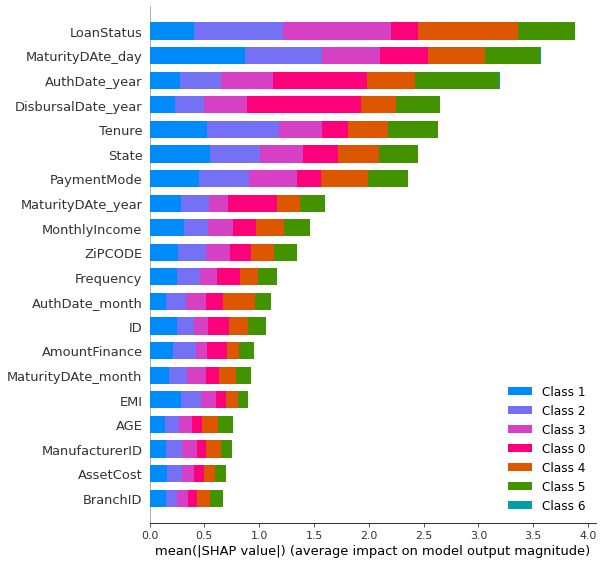

In [61]:
shap.summary_plot(shap_values,X_test.iloc[:10000,:])

In [55]:
# ######Evaluation Results
# paramter1={'nan_mode': 'Min', 
#  'gpu_ram_part': 0.95, 
#  'eval_metric': 'Accuracy',
#  'iterations': 1000, 
#  'leaf_estimation_method': 'Newton', 
#  'grow_policy': 'SymmetricTree',
#  'boosting_type': 'Plain', 
#  'feature_border_type': 'GreedyLogSum', 
#  'devices': '0:1', 
#  'l2_leaf_reg': 7, 
#  'random_strength': 1,
#  'rsm': 1, 
#  'boost_from_average': False, 
#  'gpu_cat_features_storage': 'GpuRam', 
#  'model_size_reg': 0.5, 'use_best_model': False, 
#  'class_names': [0, 1, 2, 3, 4, 5, 6], 
#  'random_seed': 0, 
#  'depth': 9,
#  'border_count': 128, 
#  'data_partition': 'DocParallel', 
#  'bagging_temperature': 1,
#  'classes_count': 0, 
#  'auto_class_weights': 'None',
#  'leaf_estimation_backtracking':
#  'AnyImprovement', 'best_model_min_trees': 1, 
#  'min_data_in_leaf': 1, 
#  'loss_function': 'MultiClass', 
#  'learning_rate': 0.7803203558921814,
#  'score_function': 'Cosine', 
#  'task_type': 'GPU',
#  'leaf_estimation_iterations': 1,
#  'bootstrap_type': 'Bayesian',
#  'max_leaves': 512}
# cboost1=CatBoostClassifier(**paramter1)
# cboost1.fit(X_smogn_train_scaled,y_train,plot=True,eval_set=test_pool)
# explainer = shap.TreeExplainer(cboost)
## shap_values=explainer.shap_values(X_test.iloc[:10000,:])
# shap.dependence_plot("AuthDate_year", shap_values[0], X_test.iloc[:10000,:])

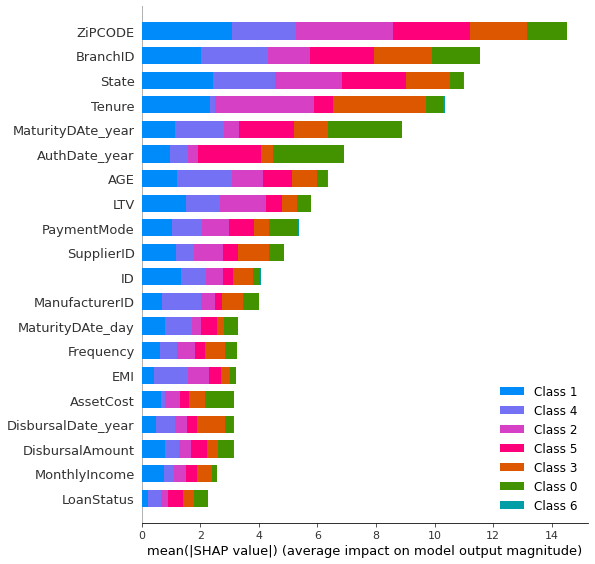

In [56]:
# paramter2={'nan_mode': 'Min',
#         'gpu_ram_part': 0.95,
#         'eval_metric': 'Accuracy',
#         'iterations': 1000,
#         'leaf_estimation_method': 'Newton',
#         'grow_policy': 'SymmetricTree',
#         'boosting_type': 'Plain',
#         'feature_border_type': 'GreedyLogSum',
#         'devices': '0:1',
#         'l2_leaf_reg': 7,
#         'random_strength': 1,
#         'rsm': 1,
#         'boost_from_average': False,
#         'gpu_cat_features_storage': 'GpuRam',
#         'model_size_reg': 0.5,
#         'use_best_model': False,
#         'class_names': [0,1,2,3,4,5,6],
#         'random_seed': 0,
#         'depth': 9,
#         'border_count': 128,
#         'data_partition': 'DocParallel',
#         'bagging_temperature': 1,
#         'classes_count': 0,
#         'auto_class_weights': 'None',
#         'leaf_estimation_backtracking': 'AnyImprovement',
#         'best_model_min_trees': 1,
#         'min_data_in_leaf': 1,
#         'loss_function': 'MultiClass',
#         'learning_rate': 0.5520108342170715,
#         'score_function': 'Cosine',
#         'task_type': 'GPU',
#         'leaf_estimation_iterations': 1,
#         'bootstrap_type': 'Bayesian',
#         'max_leaves': 512}
# cboost=CatBoostClassifier(**paramt)
# cboost.fit(X_smogn_train_scaled,y_train,plot=True,eval_set=test_pool)
# explainer = shap.TreeExplainer(cboost)
# shap_values=explainer.shap_values(X_test.iloc[:10000,:])
# shap.summary_plot(shap_values,X_test.iloc[:10000,:])

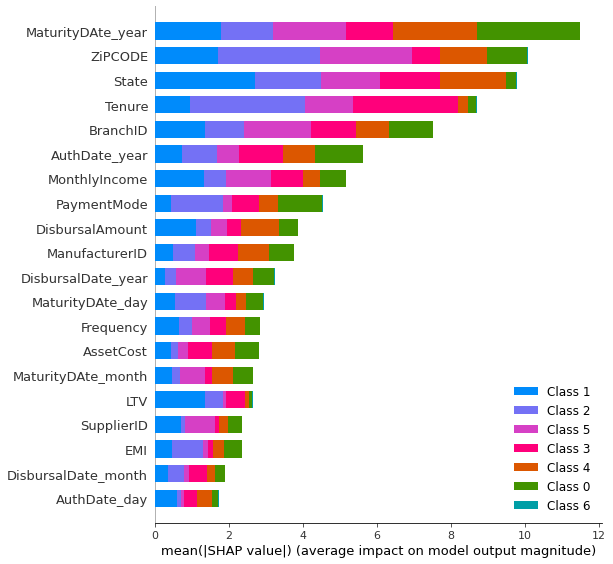